In [44]:
# importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#Loading the CSV file
churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [46]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### *Checking the null values*

In [47]:
#Checking the null values in the data
churn_data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### *Statistical info about the data*

In [48]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## ***Dropping irrelevant features***

*We will remove the following features from the dataset as they are not hepful to us in churn prediction:
RowNumber,
CustomerId,
Surname*

In [49]:
churn_data = churn_data.drop(columns=["RowNumber",
"CustomerId",
"Surname"], axis=1)
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## ***Encoding***

*Encoding the Geography feature*

In [50]:
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [51]:
#Encoding Categorical data
churn_data = pd.get_dummies(churn_data)

### *Checking for the imbalanced data*

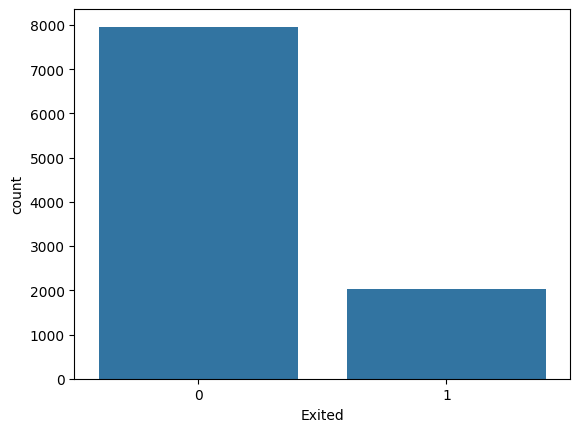

In [52]:
sns.countplot(x='Exited', data=churn_data)
plt.show()

*We can conclude that the data is highly imbalanced and thus we will use SMOTE technique to balance the data by increasing the samples of minority class in our case its the customers who has exited*

### *Dividing data into input and target variables*

In [53]:
x = churn_data.drop('Exited', axis=1)
y = churn_data['Exited']

## **SMOTE**

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_new, y_new = smote.fit_resample(x, y)

In [55]:
y_new.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

*Now, the data has been balanced*

## *Splitting the data*

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15926 non-null  int64  
 1   Age                15926 non-null  int64  
 2   Tenure             15926 non-null  int64  
 3   Balance            15926 non-null  float64
 4   NumOfProducts      15926 non-null  int64  
 5   HasCrCard          15926 non-null  int64  
 6   IsActiveMember     15926 non-null  int64  
 7   EstimatedSalary    15926 non-null  float64
 8   Geography_France   15926 non-null  bool   
 9   Geography_Germany  15926 non-null  bool   
 10  Geography_Spain    15926 non-null  bool   
 11  Gender_Female      15926 non-null  bool   
 12  Gender_Male        15926 non-null  bool   
dtypes: bool(5), float64(2), int64(6)
memory usage: 1.0 MB


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,random_state=42, test_size=0.2)

## *Scaling the data*

In [59]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)


# ***Model Training***

In [60]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

## ***Logistic Regression***

In [61]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)
print(f"LR Accuracy: {accuracy_score(y_test,lr_pred)}")
print(classification_report(y_test, lr_pred))

LR Accuracy: 0.8370998116760828
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1633
           1       0.88      0.77      0.82      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



## ***Random Forest***

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)
print(f"rf Accuracy: {accuracy_score(y_test,rf_pred)}")
print(classification_report(y_test, rf_pred))

rf Accuracy: 0.9020715630885122
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1633
           1       0.91      0.89      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



## ***Gradient Boosting Classifier***

In [63]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

gbc_pred = gbc.predict(x_test)
print(f"gbc Accuracy: {accuracy_score(y_test,gbc_pred)}")
print(classification_report(y_test, gbc_pred))

gbc Accuracy: 0.8832391713747646
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1633
           1       0.90      0.85      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



## ***K Nearest Neighbors***

In [64]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

knn_pred = knn.predict(x_test)
print(f"knn Accuracy: {accuracy_score(y_test,knn_pred)}")
print(classification_report(y_test, knn_pred))

knn Accuracy: 0.8647206528562461
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1633
           1       0.87      0.84      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



## ***Decision Tree***

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)
print(f"dt Accuracy: {accuracy_score(y_test,dt_pred)}")
print(classification_report(y_test, dt_pred))

dt Accuracy: 0.8327055869428751
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1633
           1       0.81      0.85      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



## ***Support Vector***

In [66]:
svc = SVC()
svc.fit(x_train,y_train)

svc_pred = svc.predict(x_test)
print(f"svc Accuracy: {accuracy_score(y_test,svc_pred)}")
print(classification_report(y_test, svc_pred))

svc Accuracy: 0.8882611424984307
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1633
           1       0.93      0.84      0.88      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



### *Summary of the Models Trained*

In [67]:
summary = pd.DataFrame({'Models':['LR','RF','GBC','DT','KNN', 'SVC'],
                        'Accuracy':[accuracy_score(y_test,lr_pred),
                                    accuracy_score(y_test,rf_pred),
                                    accuracy_score(y_test,gbc_pred),
                                    accuracy_score(y_test,dt_pred),
                                    accuracy_score(y_test,knn_pred),
                                    accuracy_score(y_test,svc_pred)]})

In [68]:
summary

,Models,Accuracy
0,LR,0.837100
1,RF,0.902072
2,GBC,0.883239
3,DT,0.832706
4,KNN,0.864721
5,SVC,0.888261


*We have trained multiple models and get Random Forest Classifier as the accurate and precise model with accuracy of 89%*

In [70]:
x_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.880000,True,False,False,True,False
1,608,41,1,83807.860000,1,0,1,112542.580000,False,False,True,True,False
2,502,42,8,159660.800000,3,1,0,113931.570000,True,False,False,True,False
3,699,39,1,0.000000,2,0,0,93826.630000,True,False,False,True,False
4,850,43,2,125510.820000,1,1,1,79084.100000,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,619,35,2,124285.735999,1,0,0,153663.594740,True,True,False,True,True
15922,596,41,5,153179.567300,1,0,0,36189.850138,True,False,False,False,True
15923,670,43,5,125013.600743,1,0,0,132334.174628,True,False,False,True,False
15924,624,39,8,0.000000,1,0,0,97343.524326,True,False,True,True,True


In [74]:
x_new

array([[-3.20137486e-01,  1.01401489e-01, -1.02272623e+00, ...,
        -6.32135861e-01,  8.42010481e-01, -1.22448857e+00],
       [-4.39985006e-01,  1.31347451e-03, -1.38888719e+00, ...,
         1.58193841e+00,  8.42010481e-01, -1.22448857e+00],
       [-1.59487929e+00,  1.01401489e-01,  1.17423953e+00, ...,
        -6.32135861e-01,  8.42010481e-01, -1.22448857e+00],
       ...,
       [ 2.35519196e-01,  2.01489504e-01,  7.57566471e-02, ...,
        -6.32135861e-01,  8.42010481e-01, -1.22448857e+00],
       [-2.65661341e-01, -1.98862555e-01,  1.17423953e+00, ...,
         1.58193841e+00,  8.42010481e-01,  8.16667485e-01],
       [-4.50880235e-01,  4.01665533e-01,  8.08078566e-01, ...,
         1.58193841e+00,  8.42010481e-01, -1.22448857e+00]])

In [79]:
#saving the model
import pickle
x_new = std_scaler.fit_transform(x_new)
rf.fit(x_new,y_new)
with open('churn_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf, file)